<a href="https://colab.research.google.com/github/lgcaobianco/udacityMLE/blob/master/p02m03_detectingFittingErrors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports needed

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Method to draw learning curves

In [0]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

#Data input

In [0]:
data = pd.read_csv("/home/lgcaobianco/repositorios/courses/udacity-MLE/p02m03/data.csv")
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

Now the classifier can be analysed

#Analysis of classifiers
##Logistic regression

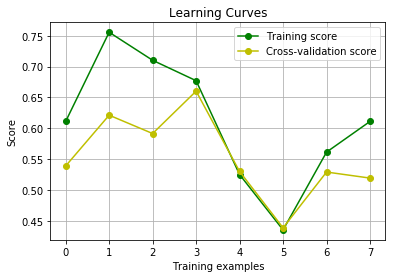

In [38]:
estimator = LogisticRegression()
draw_learning_curves(X, y, estimator, 8)

## Gradient Boosting 

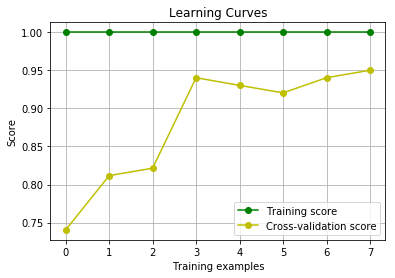

In [37]:
estimator = GradientBoostingClassifier()
draw_learning_curves(X,y,estimator, 8)

##Support Vector Machine

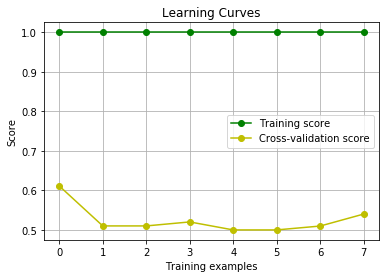

In [36]:
estimator = SVC(kernel='rbf', gamma = 1000)
draw_learning_curves(X, y, estimator, 8)

It can be noted that:
 - *Support Vector Machine* performs extremely well on training set, but poorly on C.V. set; which indicates **overfitting**
 - *Gradient Boosting* learning curves approximate each other,  showing a good score; thus it is **just right**
 - *Logistic Regression* learning curves are close to each other, however with a poor score; which indicates **underfitting**